In [1]:
import glob
import pandas as pd
import re
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

UNKNOWN_NUMBER = np.nan

TOTAL_TUITION_APPROXIMATION_FACTOR = 2.25

#Data download (20 files with 234 MB data) located at: https://collegescorecard.ed.gov/data/

In [2]:
"""Import data into a dataframe"""

file_glob = glob.glob('Raw Data/MERGED*_PP.csv')

file_dict = {}

for f in file_glob:
    academic_year = re.search("([0-9]{4})", f).group(1)        
    raw_data = pd.read_csv(f, delimiter=',', quotechar='"', low_memory=False)
    raw_data['YEAR'] = int(academic_year) - 1
    file_dict[academic_year] = raw_data

df_raw_data = pd.concat(file_dict, ignore_index=True)

In [3]:
"""Create filters to trim data into a usuable dataframe"""
relevant_years = [2002,2004,2006,2008,2010,2012]

is_In_Continental_US = df_raw_data['REGION'].isin([1,2,3,4,5,6,7,8])
is_In_Populated_Years = df_raw_data['YEAR'].isin(relevant_years)
is_4_Year_School = df_raw_data['PREDDEG'].isin([3,4])
is_Public_School = df_raw_data['CONTROL'].isin([1])
is_Private_School = df_raw_data['CONTROL'].isin([2,3])
engineering_Degree_filter =  df_raw_data['CIP14BACHL'].isin([0,1])
cs_Degree_filter =  df_raw_data['CIP11BACHL'].isin([0,1])
is_Public_or_Private_School = is_Public_School | is_Private_School

In [4]:
"""Apply filters and define index"""
df = df_raw_data[engineering_Degree_filter & cs_Degree_filter & is_Public_or_Private_School & is_4_Year_School & is_In_Populated_Years & is_In_Continental_US][['YEAR','STABBR','REGION','CONTROL','TUITIONFEE_IN','MN_EARN_WNE_P6','ACTENMID','ACTMTMID','ACTWRMID','SATVRMID','SATMTMID','SATWRMID','CIP11BACHL','CIP14BACHL']]

df.reset_index()
df.set_index(['YEAR','REGION'])

STABBR  CONTROL  TUITIONFEE_IN     MN_EARN_WNE_P6  ACTENMID  \
YEAR REGION                                                               
2002 5.0        AL      1.0         3352.0              30300      17.0   
     5.0        AL      1.0         4274.0              37500      22.0   
     5.0        AL      2.0         9440.0  PrivacySuppressed       NaN   
     5.0        AL      1.0         4126.0              40600      25.0   
     5.0        AL      1.0         3600.0              25300       NaN   
     5.0        AL      1.0         4134.0              37900      25.0   
     5.0        AL      1.0            NaN              36200       NaN   
     5.0        AL      1.0         4130.0              31600      20.0   
     5.0        AL      1.0         4426.0              42900      25.0   
     5.0        AL      2.0        18530.0              40500      27.0   
     5.0        AL      2.0         6104.0              21700       NaN   
     5.0        AL      2.0         9750.0              33800       NaN   
     5.0        AL      2.0         4860.0              33800       NaN   
     5.0        AL      2.0         4380.0              33800       NaN   
     5.0        AL      2.0        14560.0              32200      23.0   
     5.0        AL      2.0         6456.0              26900       NaN   
     5.0        AL      1.0         3540.0              32500      20.0   
     5.0        AL      2.0         8550.0              26400      24.0   
     5.0        AL      1.0         3710.0              30600      19.0   
     5.0        AL      2.0         5508.0              27200       NaN   
     5.0        AL      2.0         9270.0              32800      21.0   
     5.0        AL      1.0         3866.0              29600      23.0   
     5.0        AL      1.0         3490.0              30700      22.0   
     5.0        AL      2.0        10708.0              29800      18.0   
     5.0        AL      2.0        13154.0              39400      26.0   
     5.0        AL      1.0         3770.0              36000      21.0   
     5.0        AL      2.0        19000.0              37800      25.0   
     5.0        AL      2.0         6800.0              29700       NaN   
     5.0        AL      2.0         7848.0              23800      16.0   
     5.0        AL      2.0         7308.0              26200       NaN   
...            ...      ...            ...                ...       ...   
2012 2.0        NY      3.0            NaN                NaN       NaN   
     5.0        TN      2.0         4709.0                NaN       NaN   
     6.0        TX      2.0         4754.0                NaN       NaN   
     2.0        NY      2.0         9600.0                NaN       NaN   
     2.0        NJ      2.0        11000.0                NaN       NaN   
     5.0        NC      3.0        16360.0              34800       NaN   
     5.0        GA      1.0         3276.0              55200      21.0   
     5.0        VA      2.0         4320.0                NaN       NaN   
     4.0        MO      3.0        13780.0              29100       NaN   
     2.0        NY      3.0        16010.0              36700       NaN   
     6.0        AZ      3.0        16010.0              36700       NaN   
     3.0        IN      3.0        16010.0              36700       NaN   
     5.0        KY      3.0        16010.0              36700       NaN   
     2.0        MD      3.0        16010.0              36700       NaN   
     3.0        MI      3.0        16010.0              36700       NaN   
     4.0        MO      3.0        16010.0              36700       NaN   
     8.0        NV      3.0        16010.0              36700       NaN   
     2.0        NJ      3.0        16010.0              36700       NaN   
     5.0        NC      3.0        16010.0              36700       NaN   
     6.0        OK      3.0        16010.0              36700       NaN   
     8.0        OR      3.0        16

In [5]:
#Begin data manipulation and scrubbing

In [6]:
#initial analysis
"""At a high level, see what the current data looks like"""
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 46082 to 124276
Data columns (total 14 columns):
YEAR              13518 non-null int64
STABBR            13518 non-null object
REGION            13518 non-null float64
CONTROL           13518 non-null float64
TUITIONFEE_IN     11068 non-null float64
MN_EARN_WNE_P6    12548 non-null object
ACTENMID          5900 non-null float64
ACTMTMID          5895 non-null float64
ACTWRMID          572 non-null float64
SATVRMID          7031 non-null float64
SATMTMID          7092 non-null float64
SATWRMID          2707 non-null float64
CIP11BACHL        13518 non-null float64
CIP14BACHL        13518 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 1.5+ MB
None


In [7]:
"""To be used later: group the academic placement scores by state and store their mean values"""

gb_mean_test_scores_by_state = df.groupby('STABBR')[['ACTENMID','ACTMTMID','ACTWRMID','SATVRMID','SATMTMID','SATWRMID']].mean()

In [8]:
"""replace invalid text - 'Privacy Restricted' - with a null"""

def replace_invalid_text(s) :

    if isinstance(s,str) :
        if len(s.strip()) > 6: #this accounts for salary values. We don't want to overwrite these.
            return UNKNOWN_NUMBER        
        else:
            return s
    else:
        return s

In [9]:
"""Create placement test score bins for later plots"""

def get_ACT_score_bin(raw_score):
    
    if raw_score < 15.5:
        return 15
    elif raw_score >=15.5 and raw_score < 16:
        return 15.5
    elif raw_score >=16 and raw_score < 16.5:
        return 16
    elif raw_score >=16.5 and raw_score < 17:
        return 16.5
    elif raw_score >=17 and raw_score < 17.5:
        return 17
    elif raw_score >=17.5 and raw_score < 18:
        return 17.5
    elif raw_score >=18 and raw_score < 18.5:
        return 18
    elif raw_score >=18.5 and raw_score < 19:
        return 18.5
    elif raw_score >=19 and raw_score < 19.5:
        return 19
    elif raw_score >=19.5 and raw_score < 20:
        return 19.5
    elif raw_score >=20 and raw_score < 20.5:
        return 20
    elif raw_score >=20.5 and raw_score < 21:
        return 20.5
    elif raw_score >=20.5:
        return 21
    

In [10]:
"""Create placement test score bins for later plots"""

def get_SAT_score_bin(raw_score):
    
    if raw_score < 500:
        return 450
    elif raw_score >=500 and raw_score < 510:
        return 500
    elif raw_score >=510 and raw_score < 520:
        return 510
    elif raw_score >=520 and raw_score < 530:
        return 520
    elif raw_score >=530 and raw_score < 540:
        return 530
    elif raw_score >=540 and raw_score < 550:
        return 540
    elif raw_score >=550 and raw_score < 560:
        return 550
    elif raw_score >=560 and raw_score < 570:
        return 560
    elif raw_score >=570 and raw_score < 580:
        return 570
    elif raw_score >=580:
        return 580

In [11]:
"""Not all placement test scores are complete. This estimates values based on the available scores"""

def get_mean_score(score1, score2, score3):
    
    number_to_return = -1
    
    if np.isnan(score1) and np.isnan(score2) and np.isnan(score3) :
        number_to_return = UNKNOWN_NUMBER
        
    elif not np.isnan(score1) and np.isnan(score2) and np.isnan(score3) :
        number_to_return = (3 * score1)/3
        
    elif np.isnan(score1) and np.isnan(score2) and not np.isnan(score3) :
        number_to_return = (3 * score3)/3
        
    elif np.isnan(score1) and not np.isnan(score2) and np.isnan(score3) :
        number_to_return = (3 * score2) /3
        
    elif not np.isnan(score1) and not np.isnan(score2) and np.isnan(score3) :
        number_to_return = (score1 + 2 * score2)/3
        
    elif not np.isnan(score1) and not np.isnan(score2) and not np.isnan(score3) :
        number_to_return = (score1 + score2 + score3)/3
    
    elif not np.isnan(score1) and np.isnan(score2) and not np.isnan(score3) :
        number_to_return = (score1 + 2 * score3)/3
    
    elif np.isnan(score1) and not np.isnan(score2) and not np.isnan(score3) :
        number_to_return = (2 * score2 + score3)/3
    
    return number_to_return

In [12]:
"""Retrieve an usable ACT score"""

def get_mean_ACT_score(row) :
    
    ACT_EN_score = row['ACTENMID']
    ACT_MT_score = row['ACTMTMID']
    ACT_WR_score = row['ACTWRMID']
    
    ACT_MN_score = get_mean_score(ACT_EN_score, ACT_MT_score, ACT_WR_score)
    
    return ACT_MN_score

In [13]:
"""Retrieve an usable SAT score"""

def get_mean_SAT_score(row) :
   
    SAT_EN_score = row['SATVRMID']
    SAT_MT_score = row['SATMTMID']
    SAT_WR_score = row['SATWRMID']
    
    SAT_MN_score = get_mean_score(SAT_EN_score, SAT_MT_score, SAT_WR_score)
    
    return SAT_MN_score

In [14]:
"""Retrieve average test scores by test type"""

def get_avg_test_score(stateId, test_type):
    
    state_test_values = gb_mean_test_scores_by_state.loc[stateId]
    
    mean_score = -1
    
    if test_type == 'ACT' :
        mean_score = get_mean_ACT_score(state_test_values)
    elif test_type == 'SAT' :
        mean_score = get_mean_SAT_score(state_test_values)    
    
    return mean_score

In [15]:
"""Replace region numerical values with region names"""

def replace_region_index(region_index) :
    region_name = 'UNKNOWN'
    
    if region_index == 1:
        region_name = 'New England'
    elif region_index == 2:
        region_name = 'Mid Atlantic'
    elif region_index == 3:
        region_name = 'Great Lakes'
    elif region_index == 4:
        region_name = 'Plains'
    elif region_index == 5:
        region_name = 'Southeast'
    elif region_index == 6:
        region_name = 'Southwest'
    elif region_index == 7:
        region_name = 'Rocky Mountains'
    elif region_index == 8:
        region_name = 'Far West'
    
    return region_name
    

In [16]:
"""Replace institution control numerical values with names"""

def replace_control_index(control_index) :
    control_name = 'UNKNOWN'
    
    if control_index == 1:
        control_name = 'Public'
    elif control_index == 2:
        control_name = 'Private'
    elif control_index == 3:
        control_name = 'Private'
    
    return control_name

In [17]:
def difference_in_means(data_set_1, data_set_2):

    return np.mean(data_set_1) - np.mean(data_set_2)


In [18]:
def difference_in_stds(data_set_1, data_set_2):
    var_1 = np.var(data_set_1)
    var_2 = np.var(data_set_2)
    
    n_1 = len(data_set_1)
    n_2 = len(data_set_2)
    
    return np.sqrt(var_1/n_1 + var_2/n_2)

In [19]:
def get_permutation_sets(data_set_1, data_set_2):
    
    combined_data = np.concatenate((data_set_1, data_set_2))
        
    permuted_data = np.random.permutation(combined_data)
    
    return_set_1 = permuted_data[:len(data_set_1)]
    return_set_2 = permuted_data[len(data_set_1):]
        
    return return_set_1, return_set_2  

In [20]:
def draw_permutation_reps(data_set_1, data_set_2, func, size = 1):
    
    permutated_data_reps = np.empty(size)
    
    for i in range(size):        
        perm_set_1, perm_set_2 = get_permutation_sets(data_set_1, data_set_2)        
        permutated_data_reps[i] = func(perm_set_1, perm_set_2)
    
    return permutated_data_reps

In [21]:
def calculate_and_print_permutation_stats(data_set_1,data_set_2):
           
    obs_diff_in_means = difference_in_means(data_set_1,data_set_2)
        
    obs_diff_in_stds = difference_in_stds(data_set_1,data_set_2)

    margin_of_error = 1.96 * obs_diff_in_stds

    conf_int_min = obs_diff_in_means - margin_of_error
    conf_int_max = obs_diff_in_means + margin_of_error

    perm_reps = draw_permutation_reps(data_set_1,data_set_2,difference_in_means,10000)

    p_value = np.sum(perm_reps >= obs_diff_in_means)/len(perm_reps)

    print('Observed difference in means: {0:.2f}'.format(obs_diff_in_means))
    print('Observed difference in std: {0:.2f}'.format(obs_diff_in_stds))
    print('Observed margin of error: {0:.2f}'.format(margin_of_error))
    print('Observed confidence interval is: [{0:.2f}, {1:.2f}]'.format(conf_int_min,conf_int_max))
    print('p value: {0:.3f}'.format(p_value))
    print('')

In [22]:
"""Set null values to the default value: 0"""

df['CIP14BACHL'].fillna(0, inplace=True)
df['CIP11BACHL'].fillna(0, inplace=True) 

In [23]:
"""Process SAT scores"""

df['MN_SAT_SCORE'] = df.apply(lambda row: get_avg_test_score(row['STABBR'],'SAT'), axis=1)
df['SAT_BIN'] = df.apply(lambda row: get_SAT_score_bin(row['MN_SAT_SCORE']), axis=1)

In [24]:
"""Process ACT scores"""

df['MN_ACT_SCORE'] = df.apply(lambda row: get_avg_test_score(row['STABBR'],'ACT'), axis=1)
df['ACT_BIN'] = df.apply(lambda row: get_ACT_score_bin(row['MN_ACT_SCORE']), axis=1)

In [25]:
"""Replace invalid text in salary column"""

df['MN_EARN_WNE_P6'] = df['MN_EARN_WNE_P6'].apply(replace_invalid_text).astype(float)

In [26]:
"""Replace tuition values = 0 with null"""

df['TUITIONFEE_IN'].replace(to_replace=0, value=UNKNOWN_NUMBER, inplace=True)

"""Remove values where either tuition or salary is null"""

df.dropna(subset=['TUITIONFEE_IN','MN_EARN_WNE_P6','MN_SAT_SCORE','MN_ACT_SCORE'], how='any', inplace=True)

In [27]:
"""Create total tuition estimate column"""

df['TOTAL_TUITION'] = TOTAL_TUITION_APPROXIMATION_FACTOR * df['TUITIONFEE_IN']

In [28]:
"""Create salary-to-tuition ratio column"""

df['SALARY_TUITION_RATIO'] = df['MN_EARN_WNE_P6'] / df['TOTAL_TUITION']

In [29]:
"""Create mapped region column (used later when plotting)"""

df['MAPPED_REGION'] = df['REGION'].apply(replace_region_index)

In [30]:
"""Create mapped control column (used later when plotting)"""

df['PUBLIC_PRIVATE'] = df['CONTROL'].apply(replace_control_index)

In [31]:
"""Drop unneccesary columns"""

df.drop(['STABBR','REGION','CONTROL','ACTENMID','ACTMTMID','ACTWRMID','SATVRMID','SATMTMID','SATWRMID','TUITIONFEE_IN'], inplace=True, axis=1)

In [32]:
"""Rename remaining columns"""

df.rename(columns={'MN_EARN_WNE_P6':'SALARY','CIP14BACHL':'HAS_ENG_DEGREE','CIP11BACHL':'HAS_CS_DEGREE'}, inplace=True)

In [33]:
"""Examine updated dataframe"""

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10272 entries, 46082 to 124276
Data columns (total 12 columns):
YEAR                    10272 non-null int64
SALARY                  10272 non-null float64
HAS_CS_DEGREE           10272 non-null float64
HAS_ENG_DEGREE          10272 non-null float64
MN_SAT_SCORE            10272 non-null float64
SAT_BIN                 10272 non-null int64
MN_ACT_SCORE            10272 non-null float64
ACT_BIN                 10272 non-null float64
TOTAL_TUITION           10272 non-null float64
SALARY_TUITION_RATIO    10272 non-null float64
MAPPED_REGION           10272 non-null object
PUBLIC_PRIVATE          10272 non-null object
dtypes: float64(8), int64(2), object(2)
memory usage: 1.0+ MB
None


In [34]:
#End data manipulation and scrubbing

In [35]:
#Begin Exploratory Data Analysis

print(df.describe())

               YEAR         SALARY  HAS_CS_DEGREE  HAS_ENG_DEGREE  \
count  10272.000000   10272.000000   10272.000000    10272.000000   
mean    2007.052765   38098.101636       0.758664        0.295074   
std        3.376071    9752.830839       0.427914        0.456098   
min     2002.000000   12200.000000       0.000000        0.000000   
25%     2004.000000   32000.000000       1.000000        0.000000   
50%     2008.000000   36800.000000       1.000000        0.000000   
75%     2010.000000   42300.000000       1.000000        1.000000   
max     2012.000000  112400.000000       1.000000        1.000000   

       MN_SAT_SCORE       SAT_BIN  MN_ACT_SCORE       ACT_BIN  TOTAL_TUITION  \
count  10272.000000  10272.000000  10272.000000  10272.000000   10272.000000   
mean     531.325766    524.548287     17.937403     17.677960   37280.170926   
std       20.728673     25.390541      1.143276      1.073358   23018.796102   
min      476.275132    450.000000     16.044444     16.000

In [36]:
print(df.shape)

(10272, 12)


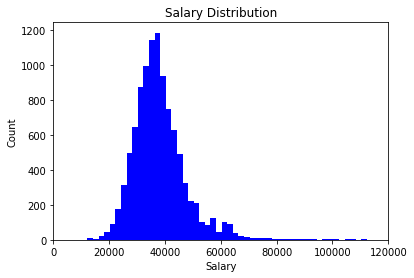

The salary mean is 38098.10 and the median is 36800.00.


In [37]:
_ = plt.hist(df['SALARY'], bins=50,color='blue')
_ = plt.xlabel('Salary')
_ = plt.ylabel('Count')
_ = plt.title('Salary Distribution')
_ = plt.xlim(0,120000)

plt.show()

print('The salary mean is {0:.2f} and the median is {1:.2f}.'.format(np.mean(df['SALARY']),np.median(df['SALARY'])))

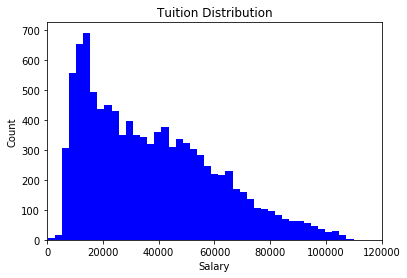

The tuition mean is 37280.17 and the median is 33311.25.


In [38]:
_ = plt.hist(df['TOTAL_TUITION'], bins=50,color='blue')
_ = plt.xlabel('Salary')
_ = plt.ylabel('Count')
_ = plt.title('Tuition Distribution')
_ = plt.xlim(0,120000)

plt.show()

print('The tuition mean is {0:.2f} and the median is {1:.2f}.'.format(np.mean(df['TOTAL_TUITION']),np.median(df['TOTAL_TUITION'])))

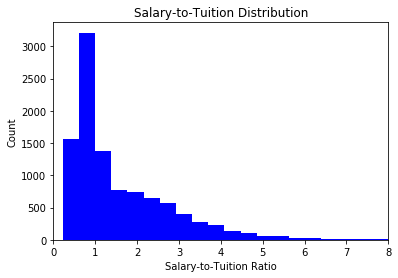

The salary-to-tuition ration mean is 1.61 and the median is 1.07.


In [39]:
_ = plt.hist(df['SALARY_TUITION_RATIO'], bins=300,color='blue')
_ = plt.xlabel('Salary-to-Tuition Ratio')
_ = plt.ylabel('Count')
_ = plt.title('Salary-to-Tuition Distribution')
_ = plt.xlim(0,8)

plt.show()

print('The salary-to-tuition ration mean is {0:.2f} and the median is {1:.2f}.'.format(np.mean(df['SALARY_TUITION_RATIO']),np.median(df['SALARY_TUITION_RATIO'])))

In [40]:
"""Let's derive some stats for the salary-to-tuition ratio distribution"""

salary_2002 = np.mean(df[df['YEAR'] == 2002]['SALARY'])
salary_2012 = np.mean(df[df['YEAR'] == 2012]['SALARY'])

tuition_2002 = np.mean(df[df['YEAR'] == 2002]['TOTAL_TUITION'])
tuition_2012 = np.mean(df[df['YEAR'] == 2012]['TOTAL_TUITION'])

salary_perc = 100 * ((salary_2012 - salary_2002)/salary_2002)
print(salary_perc)

tuition_perc = 100 * ((tuition_2012 - tuition_2002)/tuition_2002)
print(tuition_perc)

df_top = df[df['SALARY_TUITION_RATIO'] >= 4]
df_bottom = df[df['SALARY_TUITION_RATIO'] <= 1]

middle_filter_1 = df['SALARY_TUITION_RATIO'] > 1
middle_filter_2 = df['SALARY_TUITION_RATIO'] < 4

df_middle = df[middle_filter_1 & middle_filter_2]

print(100*len(df_top)/len(df))
print(100*len(df_middle)/len(df))
print(100*len(df_bottom)/len(df))

-5.1509046539947825
67.44843730374605
5.18886292834891
48.05295950155763
46.75817757009346


Here the slope = 0.10570284103106437, the y-intercept = 34157.481654531395, the Pearson r = 0.24948163104813076, the R^2 = 0.06224108423043564, and the p-value = 1.5374210085538017e-145
0.249481631048 1.53742100856e-145


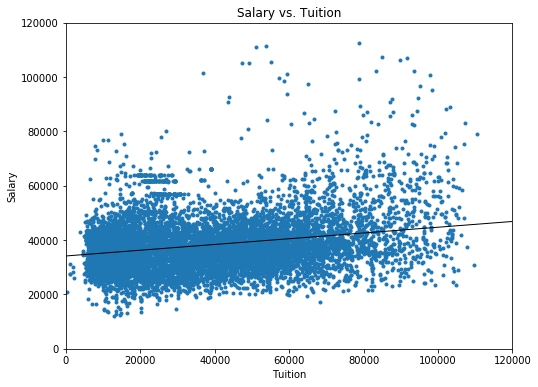

In [41]:
"""Overall, how does salary depend on tuition?"""

max_x_range = 120000
max_y_range = 120000

_ = plt.figure(figsize=(8,6))
_ = plt.plot('TOTAL_TUITION','SALARY',data=df,marker='.',linestyle='None')
_ = plt.title('Salary vs. Tuition')
_ = plt.xlabel('Tuition')
_ = plt.ylabel('Salary')
_ = plt.xlim(0,max_x_range)
_ = plt.ylim(0,max_y_range)

slope,intercept,r_value,p_value,stderr = scipy.stats.linregress(df['TOTAL_TUITION'],df['SALARY'])

x = [0, max_x_range]
y = [intercept, intercept + slope * max_x_range]

_ = plt.plot(x,y,'k-',lw=1)

print('Here the slope = {0}, the y-intercept = {1}, the Pearson r = {2}, the R^2 = {3}, and the p-value = {4}'.format(slope,intercept,r_value,r_value **2,p_value))

r_value,p_value = scipy.stats.pearsonr(df['TOTAL_TUITION'],df['SALARY'])

print(r_value,p_value)

plt.show()

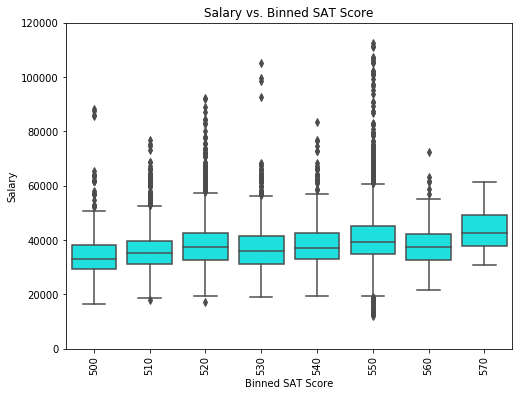

In [42]:
"""Could SAT score predict salary?"""

Y_AXIS_MAX = 120000

_ = plt.figure(figsize=(8,6))
sns.boxplot('SAT_BIN','SALARY',color='cyan',data=df,order=np.arange(500,580,10))
_ = plt.xlabel('Binned SAT Score')
_ = plt.ylabel('Salary')
_ = plt.xlim()
_ = plt.ylim(0,Y_AXIS_MAX)
_ = plt.xticks(rotation=90)
_ = plt.title('Salary vs. Binned SAT Score')

plt.show()

In [43]:
"""
To better understand the relationship between salary and SAT score, calculate the Pearson-r 
coefficient along with its p-value
"""

x = df[['MN_SAT_SCORE']]
y = df[['SALARY']]

result = scipy.stats.pearsonr(x, y)
print('Pearson r correlation coefficient is {0} with p-value of {1}'.format(result[0],result[1]))

Pearson r correlation coefficient is [ 0.20218022] with p-value of [  3.26847497e-95]


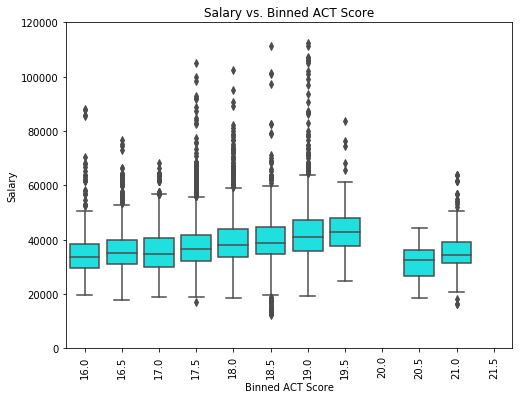

In [44]:
"""Could ACT score predict salary?"""
_ = plt.figure(figsize=(8,6))
sns.boxplot('ACT_BIN','SALARY',color='cyan',data=df,order=np.arange(16,22,0.5))
_ = plt.xlabel('Binned ACT Score')
_ = plt.ylabel('Salary')
_ = plt.ylim(0,Y_AXIS_MAX)
_ = plt.xticks(rotation=90)
_ = plt.title('Salary vs. Binned ACT Score')

plt.show()

In [45]:
"""
To better understand the relationship between salary and ACT score, calculate the Pearson-r 
coefficient along with its p-value
"""

x = df[['MN_ACT_SCORE']]
y = df[['SALARY']]

result = scipy.stats.pearsonr(x, y)
print('Pearson r correlation coefficient is {0} with p-value of {1}'.format(result[0],result[1]))


Pearson r correlation coefficient is [ 0.103845] with p-value of [  4.97067394e-26]


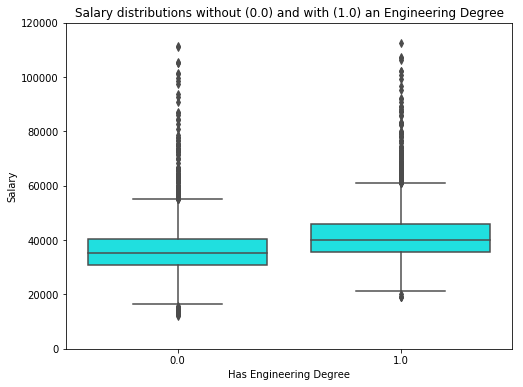

In [46]:
_ = plt.figure(figsize=(8,6))
sns.boxplot('HAS_ENG_DEGREE','SALARY',color='cyan',data=df)
_ = plt.xlabel('Has Engineering Degree')
_ = plt.ylabel('Salary')
_ = plt.ylim(0,Y_AXIS_MAX)
_ = plt.title('Salary distributions without (0.0) and with (1.0) an Engineering Degree')

plt.show()

In [47]:
calculate_and_print_permutation_stats(df[df['HAS_ENG_DEGREE'] == 1]['SALARY'],df[df['HAS_ENG_DEGREE'] == 0]['SALARY'])

Observed difference in means: 5436.29
Observed difference in std: 213.94
Observed margin of error: 419.32
Observed confidence interval is: [5016.98, 5855.61]
p value: 0.000



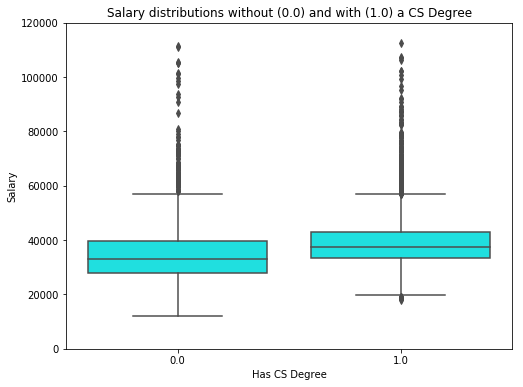

In [48]:
_ = plt.figure(figsize=(8,6))
sns.boxplot('HAS_CS_DEGREE','SALARY',color='cyan',data=df)
_ = plt.xlabel('Has CS Degree')
_ = plt.ylabel('Salary')
_ = plt.ylim(0,Y_AXIS_MAX)
_ = plt.title('Salary distributions without (0.0) and with (1.0) a CS Degree')

plt.show()

In [49]:
calculate_and_print_permutation_stats(df[df['HAS_CS_DEGREE'] == 1]['SALARY'],df[df['HAS_CS_DEGREE'] == 0]['SALARY'])

Observed difference in means: 3776.83
Observed difference in std: 248.47
Observed margin of error: 487.00
Observed confidence interval is: [3289.83, 4263.83]
p value: 0.000



In [50]:
#End Exploratory Data Analysis - Graphical

In [51]:
#Begin Machine Learning

In [52]:
"""Use statsmodels ordinary least squares to fit the predictors to the response while NOT including an intercept"""
from statsmodels.formula.api import ols

m_df =  ols('SALARY ~ TOTAL_TUITION + MN_SAT_SCORE + MN_ACT_SCORE + C(PUBLIC_PRIVATE) + C(MAPPED_REGION) + C(HAS_CS_DEGREE) + C(HAS_ENG_DEGREE)-1',df).fit()
print(m_df.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     171.9
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:33:57   Log-Likelihood:            -1.0791e+05
No. Observations:               10272   AIC:                         2.159e+05
Df Residuals:                   10258   BIC:                         2.160e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(